# Data Exploration and Preparation

In [1]:
# import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
import collections
import pickle
%matplotlib inline

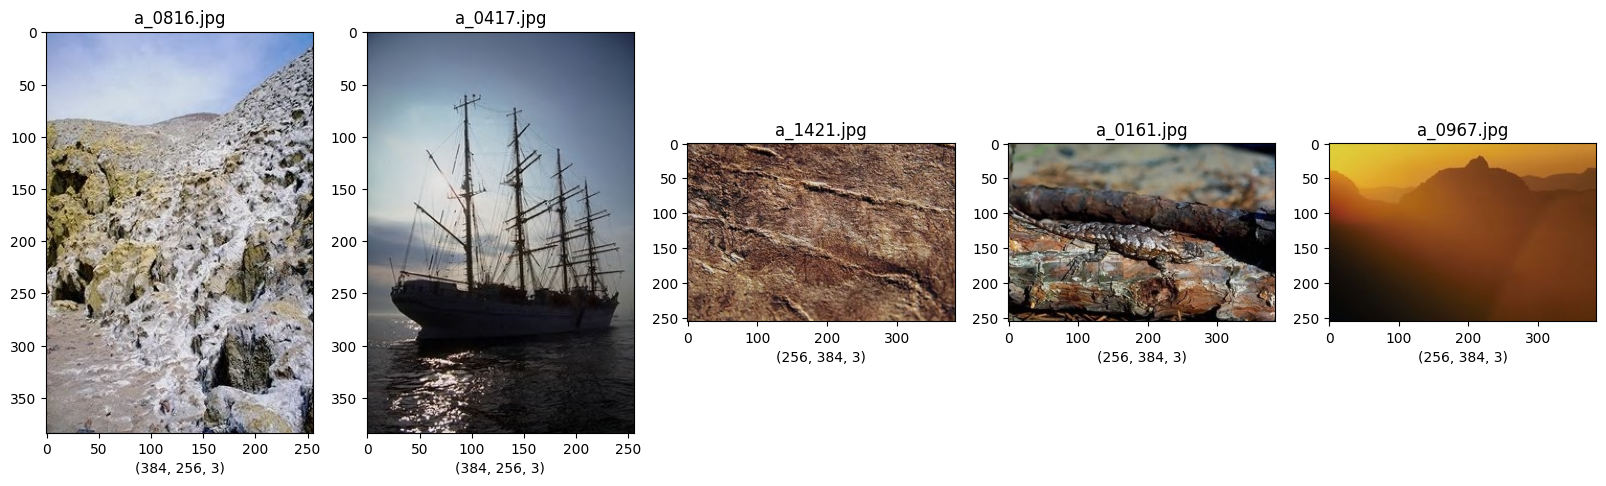

In [2]:
# testing - printing random 5 images:

plt.figure(figsize=(20,20))
test_folder = r'D:\SpoofSense_Assignment\data\traindev\authentic'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path = os.path.join(test_folder, file)
    img = mpimg.imread(image_path)
    ax = plt.subplot(1,5,i+1)
    plt.xlabel(img.shape)
    ax.title.set_text(file)
    plt.imshow(img)

### Importing the dataset and reading it:

In [3]:
def create_dataset(img_folder):
    img_data_array=[]
    # class_name=[]
    # color_flag=True
    # shapes=[]
    for dir1 in os.listdir(img_folder):
        # for f in os.listdir(os.path.join(img_folder, dir1)):
        img_path= os.path.join(img_folder, dir1)
        image= cv2.imread( img_path, cv2.COLOR_BGR2RGB)
        # image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
        # if len(image.shape)==3:
        #     if image.shape[-1]!=3:
        #         color_flag=False
        #         shapes.append(image.shape)
        image=np.array(image)
        image = image.astype('float32')
        image /= 255
        img_data_array.append(image)
        # class_name.append(dir1)

    # if "masks" not in img_folder:
    #     if color_flag==False :
    #         print(f"All the images in the folder {img_folder} are not Color!")
    #     else:
    #         print(f"All the images in the folder {img_folder} are Color!")
    # else:
    #     print(f"All the images in the folder {img_folder} are Black and White as they are masks!")
    #
    # if len(shapes)==0:
    #     print("No dimensions other than 3 are present.")
    # else:
    #     print("Dimensions other than 3 are: ",set(shapes))
    #
    # print("\n")

    return img_data_array

In [4]:
# extract the image array and class name

traindev_authentic = create_dataset(r'D:\SpoofSense_Assignment\data\traindev\authentic')
traindev_copy_images = create_dataset(r'D:\SpoofSense_Assignment\data\traindev\copy-moved\images')
traindev_copy_masks = create_dataset(r'D:\SpoofSense_Assignment\data\traindev\copy-moved\masks')
traindev_spliced_images = create_dataset(r'D:\SpoofSense_Assignment\data\traindev\spliced\images')
traindev_spliced_masks = create_dataset(r'D:\SpoofSense_Assignment\data\traindev\spliced\masks')

### Checking no. of channels in all the masks:

In [5]:
for i in range(len(traindev_copy_images)):
    if traindev_copy_images[i].shape[-1]!=3:
        print(i,"\t", traindev_copy_images[i].shape)

In [6]:
for i in range(len(traindev_spliced_images)):
    if traindev_spliced_images[i].shape[-1]!=3:
        print(i,"\t", traindev_spliced_images[i].shape)

All the images have 3D shapes --> 3 channels only.

In [7]:
is_binary=True

for i in range(len(traindev_copy_masks)):
    if len(traindev_copy_masks[i].shape)!=2:
        # print(i)
        is_binary=False

print(f"Are all the masks in copy-moved binary? {is_binary}")

Are all the masks in copy-moved binary? False


In [8]:
is_binary=True

for i in range(len(traindev_spliced_masks)):
    if len(traindev_spliced_masks[i].shape)!=2:
        # print(i)
        is_binary=False

print(f"Are all the masks in spliced binary? {is_binary}")

Are all the masks in spliced binary? False


In [9]:
traindev_copy_masks[1].shape

(384, 256)

In [10]:
traindev_copy_masks[4].shape

(600, 800, 3)

For Copy-Moved Masks:

[664, 830]


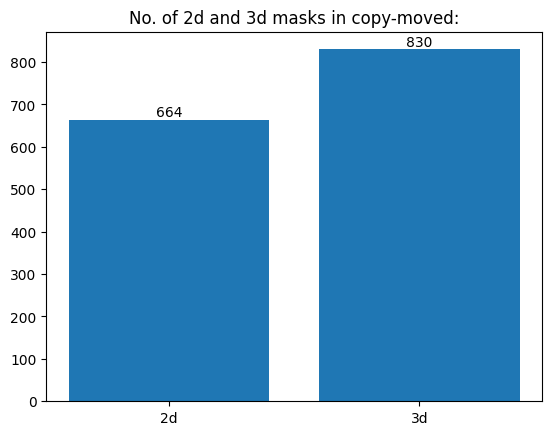

In [11]:
num_3d = 0
num_2d = 0
labels = ['2d','3d']
for i in range(len(traindev_copy_masks)):
    if len(traindev_copy_masks[i].shape)==3:
        num_3d+=1
    else:
        num_2d+=1
freq = [num_2d,num_3d]
print(freq)
fig, ax = plt.subplots()

ax.bar(labels, freq)
for i, freq in enumerate(freq):
    ax.text(i, freq, str(freq), ha='center', va='bottom')
ax.set_title("No. of 2d and 3d masks in copy-moved:")

plt.show()

In [12]:
for i in range(len(traindev_copy_masks)):
    if len(traindev_copy_masks[i].shape)==3:
        traindev_copy_masks[i] = np.mean(traindev_copy_masks[i], axis=2)

In [15]:
num_3d = 0
num_2d = 0
labels = ['2d','3d']
for i in range(len(traindev_copy_masks)):
    if len(traindev_copy_masks[i].shape)==3:
        num_3d+=1
    else:
        num_2d+=1
freq = [num_2d,num_3d]
print(freq)

[1494, 0]


For Spliced Masks:

[877, 617]


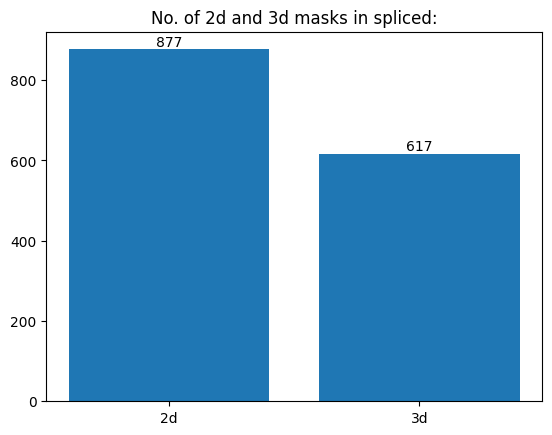

In [13]:
num_3d = 0
num_2d = 0
labels = ['2d','3d']
for i in range(len(traindev_spliced_masks)):
    if len(traindev_spliced_masks[i].shape)==3:
        num_3d+=1
    else:
        num_2d+=1
freq = [num_2d,num_3d]
print(freq)
fig, ax = plt.subplots()

ax.bar(labels, freq)
for i, freq in enumerate(freq):
    ax.text(i, freq, str(freq), ha='center', va='bottom')
ax.set_title("No. of 2d and 3d masks in spliced:")

plt.show()

In [14]:
for i in range(len(traindev_spliced_masks)):
    if len(traindev_spliced_masks[i].shape)==3:
        traindev_spliced_masks[i] = np.mean(traindev_spliced_masks[i], axis=2)

In [16]:
num_3d = 0
num_2d = 0
labels = ['2d','3d']
for i in range(len(traindev_spliced_masks)):
    if len(traindev_spliced_masks[i].shape)==3:
        num_3d+=1
    else:
        num_2d+=1
freq = [num_2d,num_3d]
print(freq)

[1494, 0]


### Checking the dimensions of all the images:

In [17]:
def dim_freq(dataset, name):
    dims = [img.shape[:2] for img in dataset]
    dims_count = collections.Counter(dims)
    top_dimensions = dims_count.most_common(20)
    dimensions, frequencies = zip(*top_dimensions)
    dimensions = [f"{dim[0]}x{dim[1]}" for dim in dimensions]
    # plt.figure(figsize=(8,5))
    plt.xlabel('Image Dimensions')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {name} Image Dimensions')
    plt.xticks(rotation=45)
    plt.xticks(fontsize=8)
    plt.bar(dimensions, frequencies)
    for i, freq in enumerate(frequencies):
        plt.text(i, freq, str(freq), ha='center', va='bottom')

    plt.show()

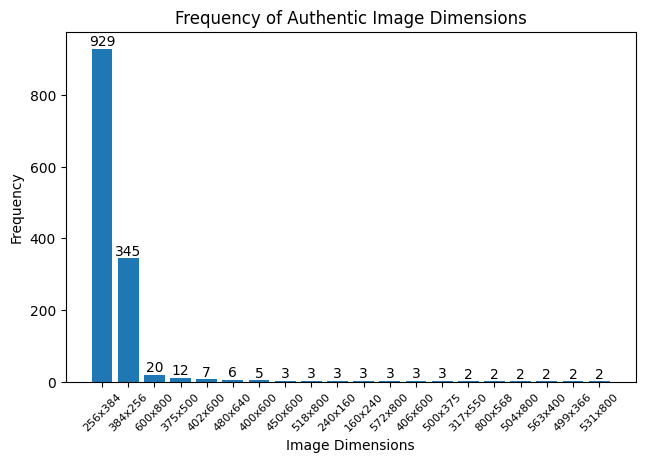

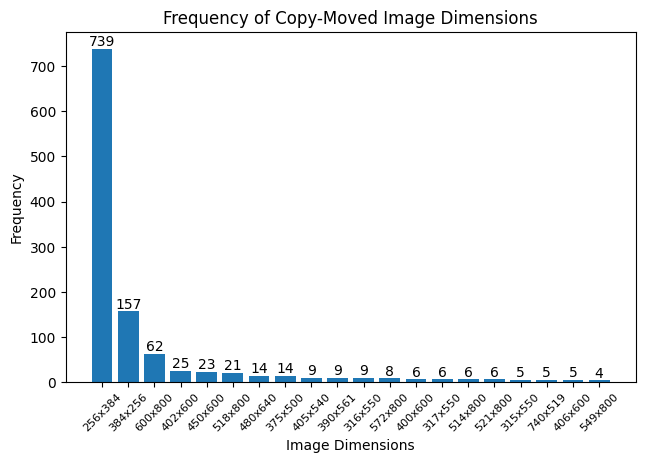

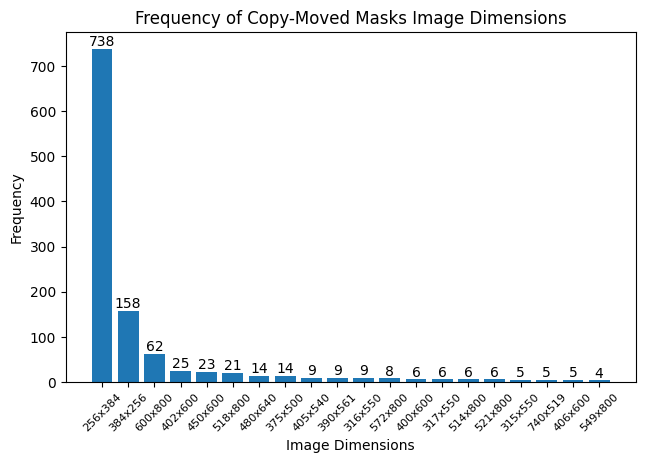

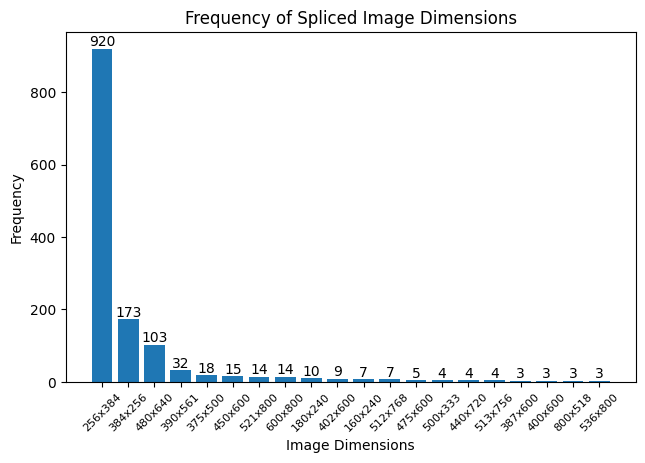

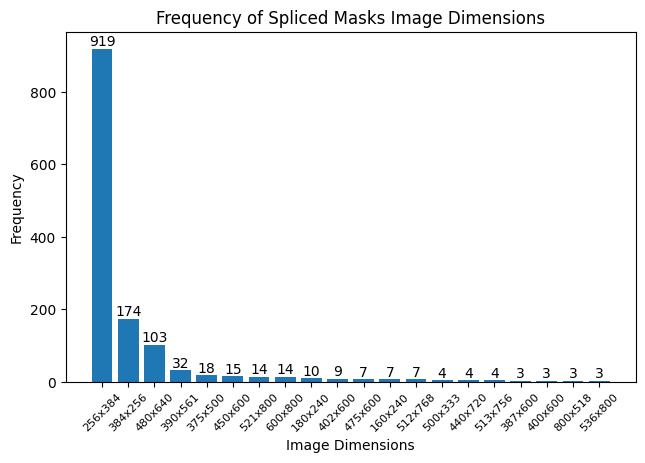

In [18]:
plt.figure(figsize=(25,10))
plt.subplot(2,3,1)
dim_freq(traindev_authentic,"Authentic")

plt.figure(figsize=(25,10))
plt.subplot(2,3,2)
dim_freq(traindev_copy_images, "Copy-Moved")

plt.figure(figsize=(25,10))
plt.subplot(2,3,3)
dim_freq(traindev_copy_masks, "Copy-Moved Masks")

plt.figure(figsize=(25,10))
plt.subplot(2,3,4)
dim_freq(traindev_spliced_images, "Spliced")

plt.figure(figsize=(25,10))
plt.subplot(2,3,5)
dim_freq(traindev_spliced_masks, "Spliced Masks")

The masked images in Copy-moved and Spliced images mismatched.

COPY-MOVED Images:
    - (256,384): 739 MASKS: 738
    - (384,256): 157 MASKS: 158

SPLICED Images:
    - (256,384): 920 MASKS: 919
    - (384,256): 173 MASKS: 174

So we need to rotate the mismatched ones in copy-moved and spliced images and resize all the other images to (256,384) (since that is the most used)

### Checking and rotating the dimensionally mismatched images:

In [19]:
def check_mismatched(images_folder, masks_folder):
    img_i=[]
    img_j=[]
    for i in os.listdir(images_folder):
        img_i.append(i)

    for j in os.listdir(masks_folder):
        img_j.append(j)

    # print(img_i[0])

    print("Checking mismatched images in (256,384): ")
    for i in range(len(img_i)):
        img = mpimg.imread(os.path.join(images_folder, img_i[i]))
        img_mk = mpimg.imread(os.path.join(masks_folder, img_j[i]))
        if img.shape[:2] == (256, 384):
            if img_mk.shape[:2] != img.shape[:2]:
                # plt.subplot(1,2,1)
                plt.imshow(img)
                print(i)
                print("Image shape: ",img.shape)
                print("Mask Shape: ",img_mk.shape)
                print("\n")

Checking mismatched images in (256,384): 
1317
Image shape:  (256, 384, 3)
Mask Shape:  (384, 256)




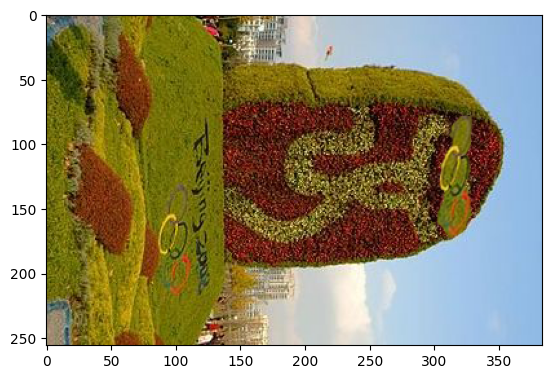

In [20]:
copy_moved_images_folder = r'D:\SpoofSense_Assignment\data\traindev\copy-moved\images'
copy_moved_masks_folder = r'D:\SpoofSense_Assignment\data\traindev\copy-moved\masks'
spliced_images_folder = r'D:\SpoofSense_Assignment\data\traindev\spliced\images'
spliced_masks_folder = r'D:\SpoofSense_Assignment\data\traindev\spliced\masks'


check_mismatched(copy_moved_images_folder, copy_moved_masks_folder)

In [21]:
traindev_copy_images[1317] = cv2.rotate(traindev_copy_images[1317], rotateCode=2)

Checking mismatched images in (256,384): 
692
Image shape:  (256, 384, 3)
Mask Shape:  (384, 256)




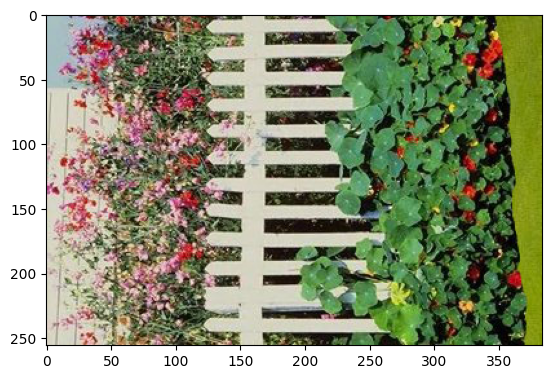

In [22]:
check_mismatched(spliced_images_folder, spliced_masks_folder)

In [23]:
traindev_spliced_images[692] = cv2.rotate(traindev_spliced_images[692], rotateCode=0)

### Rechecking the images' dimensions:

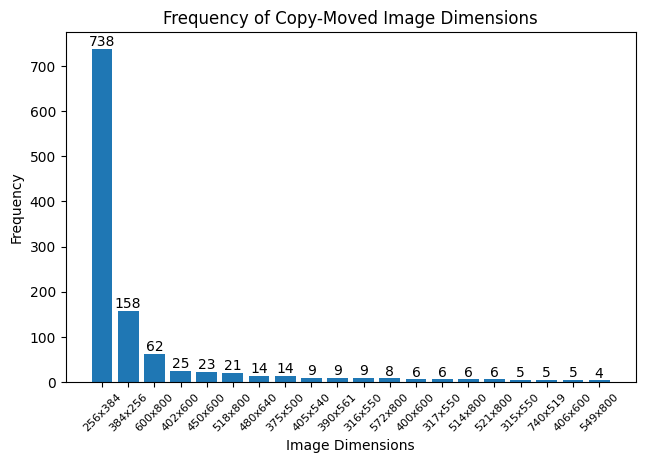

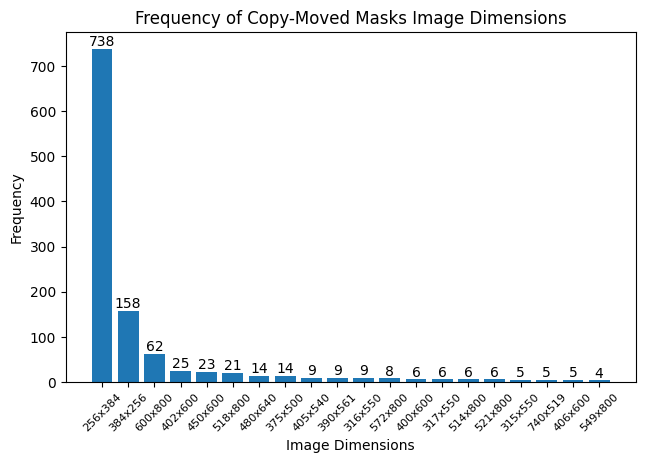

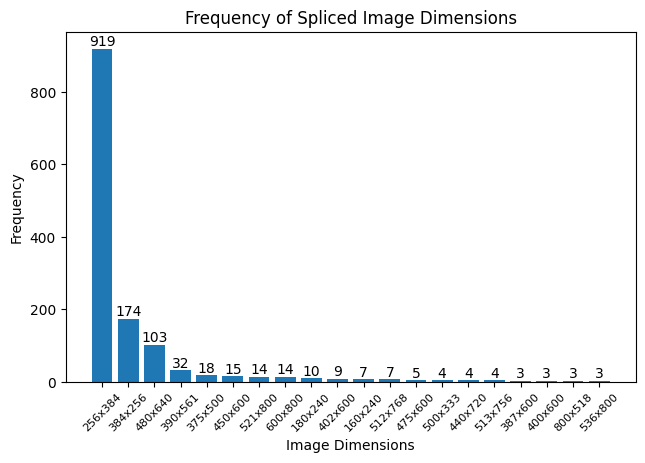

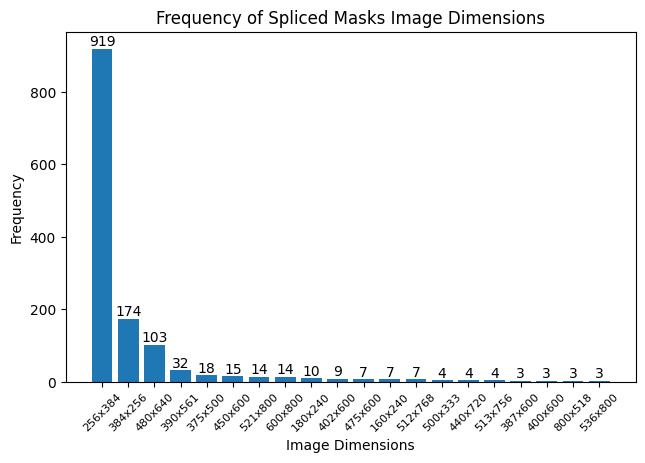

In [24]:
# plt.figure(figsize=(25,10))
# plt.subplot(2,3,1)
# dim_freq(traindev_authentic,"Authentic")

plt.figure(figsize=(25,10))
plt.subplot(2,3,2)
dim_freq(traindev_copy_images, "Copy-Moved")

plt.figure(figsize=(25,10))
plt.subplot(2,3,3)
dim_freq(traindev_copy_masks, "Copy-Moved Masks")

plt.figure(figsize=(25,10))
plt.subplot(2,3,4)
dim_freq(traindev_spliced_images, "Spliced")

plt.figure(figsize=(25,10))
plt.subplot(2,3,5)
dim_freq(traindev_spliced_masks, "Spliced Masks")

In [25]:
with open('images_modified.pkl', 'wb') as f:
    pickle.dump((traindev_authentic, traindev_copy_images, traindev_copy_masks, traindev_spliced_images, traindev_spliced_masks),f)

In [ ]:
for i in range(traindev_copy_masks):

## TESTING DATA:

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_dataset(img_folder):
    img_data_array=[]
    # class_name=[]
    # color_flag=True
    # shapes=[]
    for dir1 in os.listdir(img_folder):
        # for f in os.listdir(os.path.join(img_folder, dir1)):
        img_path= os.path.join(img_folder, dir1)
        image= cv2.imread( img_path, cv2.COLOR_BGR2RGB)
        # image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
        # if len(image.shape)==3:
        #     if image.shape[-1]!=3:
        #         color_flag=False
        #         shapes.append(image.shape)
        image=np.array(image)
        image = image.astype('float32')
        image /= 255
        img_data_array.append(image)
        # class_name.append(dir1)

    # if "masks" not in img_folder:
    #     if color_flag==False :
    #         print(f"All the images in the folder {img_folder} are not Color!")
    #     else:
    #         print(f"All the images in the folder {img_folder} are Color!")
    # else:
    #     print(f"All the images in the folder {img_folder} are Black and White as they are masks!")
    #
    # if len(shapes)==0:
    #     print("No dimensions other than 3 are present.")
    # else:
    #     print("Dimensions other than 3 are: ",set(shapes))
    #
    # print("\n")

    return img_data_array

In [3]:
test_authentic = create_dataset(r'D:\SpoofSense_Assignment\data\test\authentic')
test_copy_images = create_dataset(r'D:\SpoofSense_Assignment\data\test\copy-moved\images')
test_copy_masks = create_dataset(r'D:\SpoofSense_Assignment\data\test\copy-moved\masks')
test_spliced_masks = create_dataset(r'D:\SpoofSense_Assignment\data\test\spliced\masks')
test_spliced_images = create_dataset(r'D:\SpoofSense_Assignment\data\test\spliced\images')

In [4]:
for i in range(len(test_copy_images)):
    if test_copy_images[i].shape[-1]!=3:
        print(i,"\t", test_copy_images[i].shape)

In [5]:
for i in range(len(test_spliced_images)):
    if test_spliced_images[i].shape[-1]!=3:
        print(i,"\t", test_spliced_images[i].shape)

In [6]:
is_binary=True

for i in range(len(test_copy_masks)):
    if len(test_copy_masks[i].shape)!=2:
        # print(i)
        is_binary=False

print(f"Are all the masks in copy-moved binary? {is_binary}")

Are all the masks in copy-moved binary? False


In [7]:
is_binary=True

for i in range(len(test_spliced_masks)):
    if len(test_spliced_masks[i].shape)!=2:
        # print(i)
        is_binary=False

print(f"Are all the masks in spliced binary? {is_binary}")

Are all the masks in spliced binary? False


[61, 105]


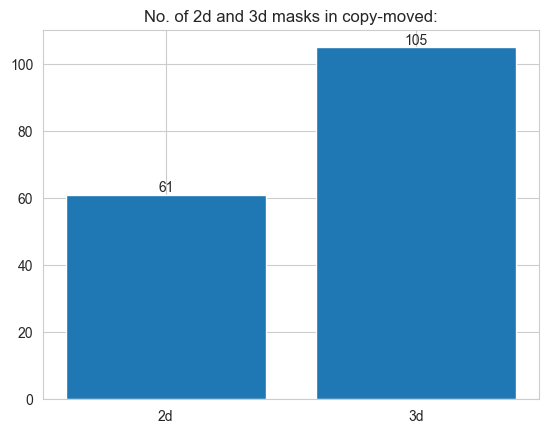

In [8]:
num_3d = 0
num_2d = 0
labels = ['2d','3d']
for i in range(len(test_copy_masks)):
    if len(test_copy_masks[i].shape)==3:
        num_3d+=1
    else:
        num_2d+=1
freq = [num_2d,num_3d]
print(freq)
fig, ax = plt.subplots()

ax.bar(labels, freq)
for i, freq in enumerate(freq):
    ax.text(i, freq, str(freq), ha='center', va='bottom')
ax.set_title("No. of 2d and 3d masks in copy-moved:")

plt.show()

In [9]:
for i in range(len(test_copy_masks)):
    if len(test_copy_masks[i].shape)==3:
        test_copy_masks[i] = np.mean(test_copy_masks[i], axis=2)

In [10]:
num_3d = 0
num_2d = 0
labels = ['2d','3d']
for i in range(len(test_copy_masks)):
    if len(test_copy_masks[i].shape)==3:
        num_3d+=1
    else:
        num_2d+=1
freq = [num_2d,num_3d]
print(freq)

[166, 0]


For Spliced Masks:

[90, 76]


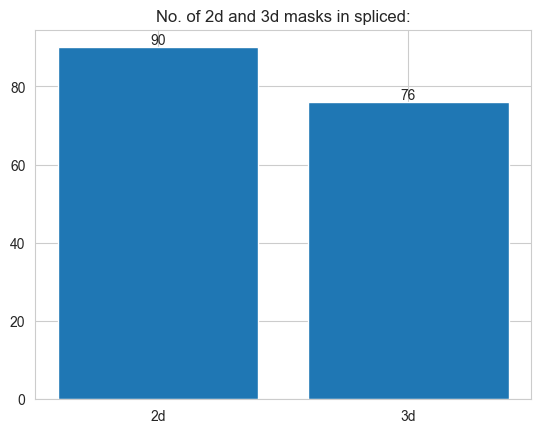

In [11]:
num_3d = 0
num_2d = 0
labels = ['2d','3d']
for i in range(len(test_spliced_masks)):
    if len(test_spliced_masks[i].shape)==3:
        num_3d+=1
    else:
        num_2d+=1
freq = [num_2d,num_3d]
print(freq)
fig, ax = plt.subplots()

ax.bar(labels, freq)
for i, freq in enumerate(freq):
    ax.text(i, freq, str(freq), ha='center', va='bottom')
ax.set_title("No. of 2d and 3d masks in spliced:")

plt.show()

In [12]:
for i in range(len(test_spliced_masks)):
    if len(test_spliced_masks[i].shape)==3:
        test_spliced_masks[i] = np.mean(test_spliced_masks[i], axis=2)

In [13]:
num_3d = 0
num_2d = 0
labels = ['2d','3d']
for i in range(len(test_spliced_masks)):
    if len(test_spliced_masks[i].shape)==3:
        num_3d+=1
    else:
        num_2d+=1
freq = [num_2d,num_3d]
print(freq)

[166, 0]


### Checking the dimensions of all the images:

In [14]:
import collections

In [15]:
def dim_freq(dataset, name):
    dims = [img.shape[:2] for img in dataset]
    dims_count = collections.Counter(dims)
    top_dimensions = dims_count.most_common(20)
    dimensions, frequencies = zip(*top_dimensions)
    dimensions = [f"{dim[0]}x{dim[1]}" for dim in dimensions]
    # plt.figure(figsize=(8,5))
    plt.xlabel('Image Dimensions')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {name} Image Dimensions')
    plt.xticks(rotation=45)
    plt.xticks(fontsize=8)
    plt.bar(dimensions, frequencies)
    for i, freq in enumerate(frequencies):
        plt.text(i, freq, str(freq), ha='center', va='bottom')

    plt.show()

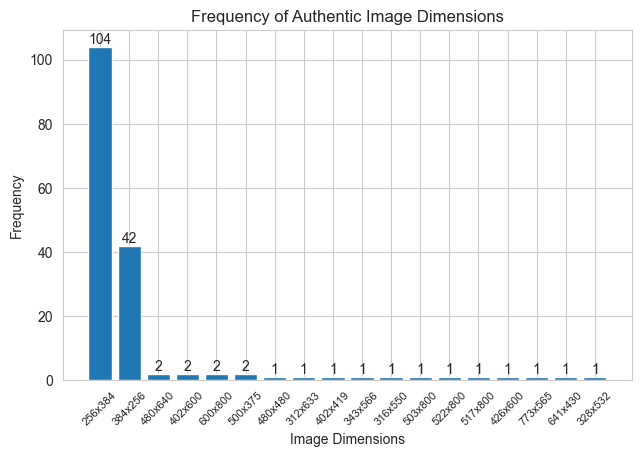

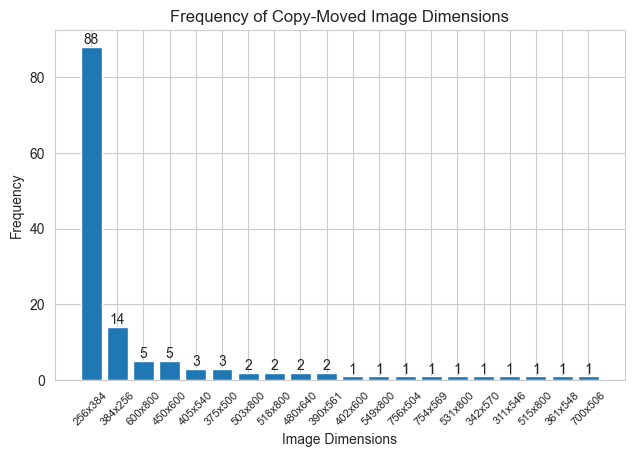

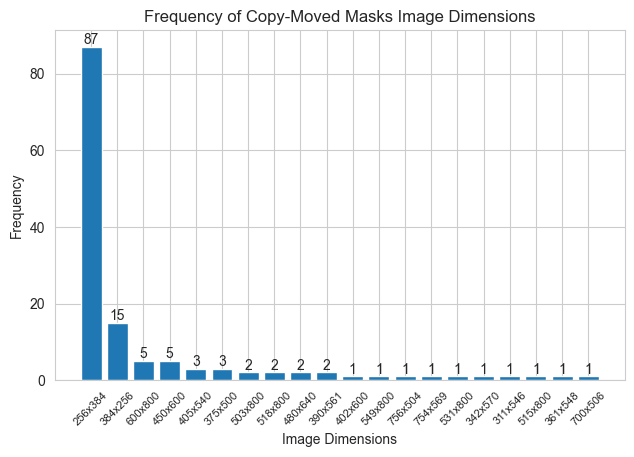

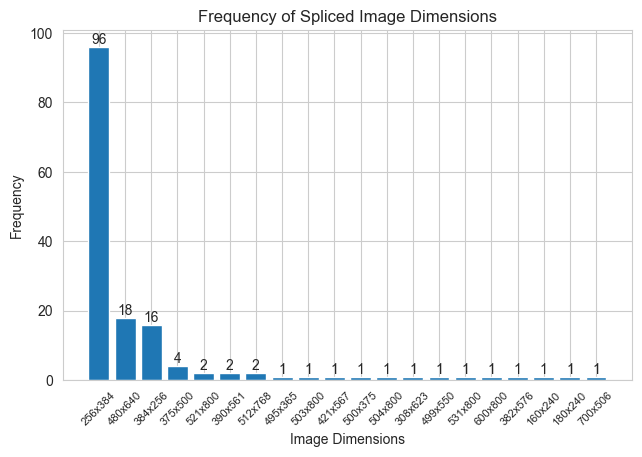

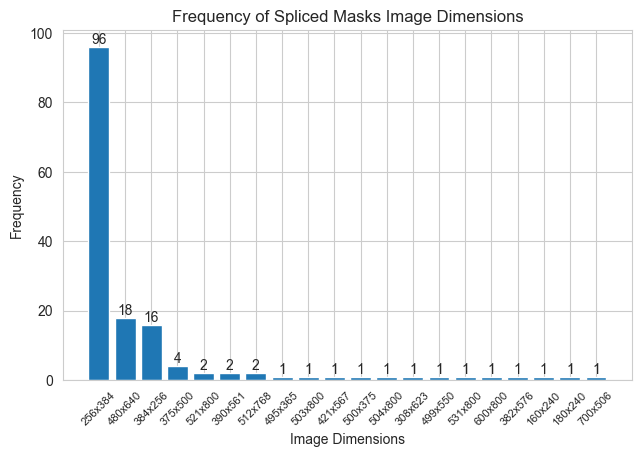

In [16]:
plt.figure(figsize=(25,10))
plt.subplot(2,3,1)
dim_freq(test_authentic,"Authentic")

plt.figure(figsize=(25,10))
plt.subplot(2,3,2)
dim_freq(test_copy_images, "Copy-Moved")

plt.figure(figsize=(25,10))
plt.subplot(2,3,3)
dim_freq(test_copy_masks, "Copy-Moved Masks")

plt.figure(figsize=(25,10))
plt.subplot(2,3,4)
dim_freq(test_spliced_images, "Spliced")

plt.figure(figsize=(25,10))
plt.subplot(2,3,5)
dim_freq(test_spliced_masks, "Spliced Masks")

### Checking and rotating the dimensionally mismatched images:

In [17]:
import matplotlib.image as mpimg

In [18]:
def check_mismatched(images_folder, masks_folder):
    img_i=[]
    img_j=[]
    for i in os.listdir(images_folder):
        img_i.append(i)

    for j in os.listdir(masks_folder):
        img_j.append(j)

    # print(img_i[0])

    print("Checking mismatched images in (256,384): ")
    for i in range(len(img_i)):
        img = mpimg.imread(os.path.join(images_folder, img_i[i]))
        img_mk = mpimg.imread(os.path.join(masks_folder, img_j[i]))
        if img.shape[:2] == (256, 384):
            if img_mk.shape[:2] != img.shape[:2]:
                # plt.subplot(1,2,1)
                plt.imshow(img)
                print(i)
                print("Image shape: ",img.shape)
                print("Mask Shape: ",img_mk.shape)
                print("\n")

Checking mismatched images in (256,384): 
40
Image shape:  (256, 384, 3)
Mask Shape:  (384, 256)




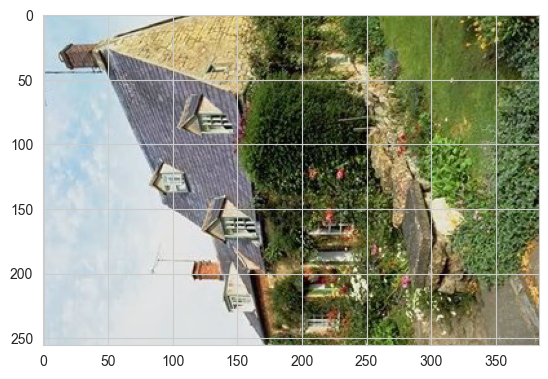

In [19]:
copy_moved_images_folder = r'D:\SpoofSense_Assignment\data\test\copy-moved\images'
copy_moved_masks_folder = r'D:\SpoofSense_Assignment\data\test\copy-moved\masks'
spliced_images_folder = r'D:\SpoofSense_Assignment\data\test\spliced\images'
spliced_masks_folder = r'D:\SpoofSense_Assignment\data\test\spliced\masks'


check_mismatched(copy_moved_images_folder, copy_moved_masks_folder)

In [20]:
test_copy_images[40] = cv2.rotate(test_copy_images[40], rotateCode=0)

In [21]:
import pickle

In [22]:
with open('test_images_modified.pkl', 'wb') as f:
    pickle.dump((test_authentic, test_copy_images, test_copy_masks, test_spliced_images, test_spliced_masks),f)

In [68]:
temp_resize = cv2.resize(temp, temp.shape[:2], interpolation = cv2.INTER_AREA)

In [81]:
temp_resize.shape

(256, 384, 3)

In [14]:
temp.shape[:2]

(384, 256)

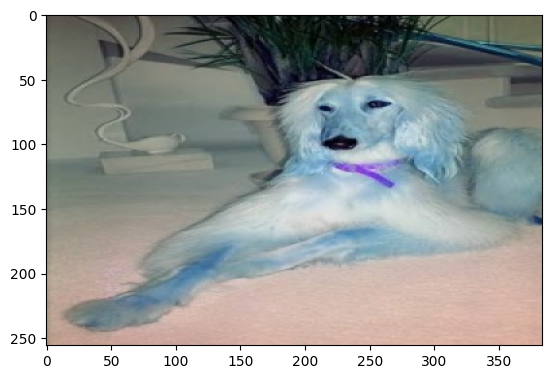

In [82]:
plt.imshow(temp_resize)